# EDA

In [2]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision', 3)

In [4]:
# Cargamos la información de la primer planta
df_plant2_gen = pd.read_csv('DATASETS/Plant_2_Generation_Data.csv', parse_dates=["DATE_TIME"])
df_plant2_weather = pd.read_csv('DATASETS/Plant_2_Weather_Sensor_Data.csv', parse_dates=["DATE_TIME"])

In [5]:
# Mostramos las primeras 10 filas de df_plant1_gen
df_plant2_gen.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0     9425.000  \
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0        0.000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0     3075.333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0      269.933   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000   
5 2020-05-15   4136001  LYwnQax7tkwH5Cb       0.0       0.0     1872.500   
6 2020-05-15   4136001  LlT2YUhhzqhg5Sw       0.0       0.0     1094.357   
7 2020-05-15   4136001  Mx2yZCDsyf6DPfv       0.0       0.0     5692.200   
8 2020-05-15   4136001  NgDl19wMapZy17u       0.0       0.0     1866.200   
9 2020-05-15   4136001  PeE6FRyGXUgsRhN       0.0       0.0      651.200   

   TOTAL_YIELD  
0    2.429e+06  
1    1.215e+09  
2    2.248e+09  
3    1.704e+06  
4    1.994e+07  
5    1.795e+09  
6    2.826e+08  
7    2.454e+06  
8    1.115e+08  
9    1.348e+09

In [6]:
# Mostramos las primeras 10 filas de df_plant1_weather
df_plant2_weather.head(10)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE   
0 2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0               27.005  \
1 2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0               26.881   
2 2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0               26.682   
3 2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0               26.501   
4 2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0               26.596   
5 2020-05-15 01:15:00   4136001  iq8k7ZNt4Mwm3w0               26.513   
6 2020-05-15 01:30:00   4136001  iq8k7ZNt4Mwm3w0               26.494   
7 2020-05-15 01:45:00   4136001  iq8k7ZNt4Mwm3w0               26.420   
8 2020-05-15 02:00:00   4136001  iq8k7ZNt4Mwm3w0               26.402   
9 2020-05-15 02:15:00   4136001  iq8k7ZNt4Mwm3w0               26.226   

   MODULE_TEMPERATURE  IRRADIATION  
0              25.061          0.0  
1              24.422          0.0  
2              24.427          0.0  
3              24.421          0.0  
4              25.088          0.0  
5              25.318          0.0  
6              25.217          0.0  
7              25.065          0.0  
8              24.691          0.0  
9              24.559          0.0

In [7]:
print(df_plant2_gen['SOURCE_KEY'].unique().size)
print(df_plant2_weather['SOURCE_KEY'].unique().size)

print(df_plant2_gen['PLANT_ID'].unique().size)
print(df_plant2_weather['PLANT_ID'].unique().size)


22
1
1
1


In [8]:
# Información estadistica de df_plant1_weather
df_plant2_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [9]:
df_plant2_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [10]:
df = df_plant2_gen.merge(df_plant2_weather, on=["DATE_TIME", "PLANT_ID"], suffixes=("_GENERATION", "_WEATHER"))
df.head()

DATE_TIME  PLANT_ID SOURCE_KEY_GENERATION  DC_POWER  AC_POWER  DAILY_YIELD   
0 2020-05-15   4136001       4UPUqMRk7TRMgml       0.0       0.0     9425.000  \
1 2020-05-15   4136001       81aHJ1q11NBPMrL       0.0       0.0        0.000   
2 2020-05-15   4136001       9kRcWv60rDACzjR       0.0       0.0     3075.333   
3 2020-05-15   4136001       Et9kgGMDl729KT4       0.0       0.0      269.933   
4 2020-05-15   4136001       IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000   

   TOTAL_YIELD SOURCE_KEY_WEATHER  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   
0    2.429e+06    iq8k7ZNt4Mwm3w0               27.005              25.061  \
1    1.215e+09    iq8k7ZNt4Mwm3w0               27.005              25.061   
2    2.248e+09    iq8k7ZNt4Mwm3w0               27.005              25.061   
3    1.704e+06    iq8k7ZNt4Mwm3w0               27.005              25.061   
4    1.994e+07    iq8k7ZNt4Mwm3w0               27.005              25.061   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE_TIME              67698 non-null  datetime64[ns]
 1   PLANT_ID               67698 non-null  int64         
 2   SOURCE_KEY_GENERATION  67698 non-null  object        
 3   DC_POWER               67698 non-null  float64       
 4   AC_POWER               67698 non-null  float64       
 5   DAILY_YIELD            67698 non-null  float64       
 6   TOTAL_YIELD            67698 non-null  float64       
 7   SOURCE_KEY_WEATHER     67698 non-null  object        
 8   AMBIENT_TEMPERATURE    67698 non-null  float64       
 9   MODULE_TEMPERATURE     67698 non-null  float64       
 10  IRRADIATION            67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 5.7+ MB


In [12]:
df.describe()

DATE_TIME   PLANT_ID   DC_POWER   AC_POWER   
count                          67698  6.770e+04  67698.000  67698.000  \
mean   2020-06-01 10:44:33.650625024  4.136e+06    246.702    241.278   
min              2020-05-15 00:00:00  4.136e+06      0.000      0.000   
25%              2020-05-23 21:00:00  4.136e+06      0.000      0.000   
50%              2020-06-01 23:00:00  4.136e+06      0.000      0.000   
75%              2020-06-09 23:30:00  4.136e+06    446.592    438.215   
max              2020-06-17 23:45:00  4.136e+06   1420.933   1385.420   
std                              NaN  0.000e+00    370.570    362.112   

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   
count    67698.000    6.770e+04            67698.000           67698.000  \
mean      3294.890    6.589e+08               27.987              32.607   
min          0.000    0.000e+00               20.942              20.265   
25%        272.750    1.996e+07               24.570              23.686   
50%       2911.000    2.826e+08               26.910              27.434   
75%       5534.000    1.348e+09               30.913              40.019   
max       9873.000    2.248e+09               39.182              66.636   
std       2919.448    7.297e+08                4.021              11.226   

       IRRADIATION  
count    67698.000  
mean         0.229  
min          0.000  
25%          0.000  
50%          0.019  
75%          0.431  
max          1.099  
std          0.309

In [14]:
df['DATE_TIME'].dt.date.nunique()

34

In [15]:
df.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
dtype: int64

In [16]:
df = df.sort_values(["PLANT_ID", "DATE_TIME"]).reset_index(drop=True)

# Graficamos como serie de tiempo

In [16]:
def plot_date(df, date):
    
    ''' Plot data of the specified date'''
    
    plants = df.PLANT_ID.unique()
    df = df.loc[df.DATE_TIME.apply(lambda x: x.date()) == pd.Timestamp(date).date()]
    y_list = ["DC_POWER", "AC_POWER", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
    x = "DATE_TIME"
    colors = ["C{}".format(i) for i in range(len(y_list))]
    
    fig,ax = plt.subplots(1, len(y_list), figsize=(7*len(y_list),5))
    
    for i,y in enumerate(y_list):
        sns.lineplot(data=df, x=x, y=y, hue="PLANT_ID", palette=["C0", "C1"], ax=ax[i])
        ax[i].set_xlabel("")
        ax[i].tick_params(axis="x", rotation=45)


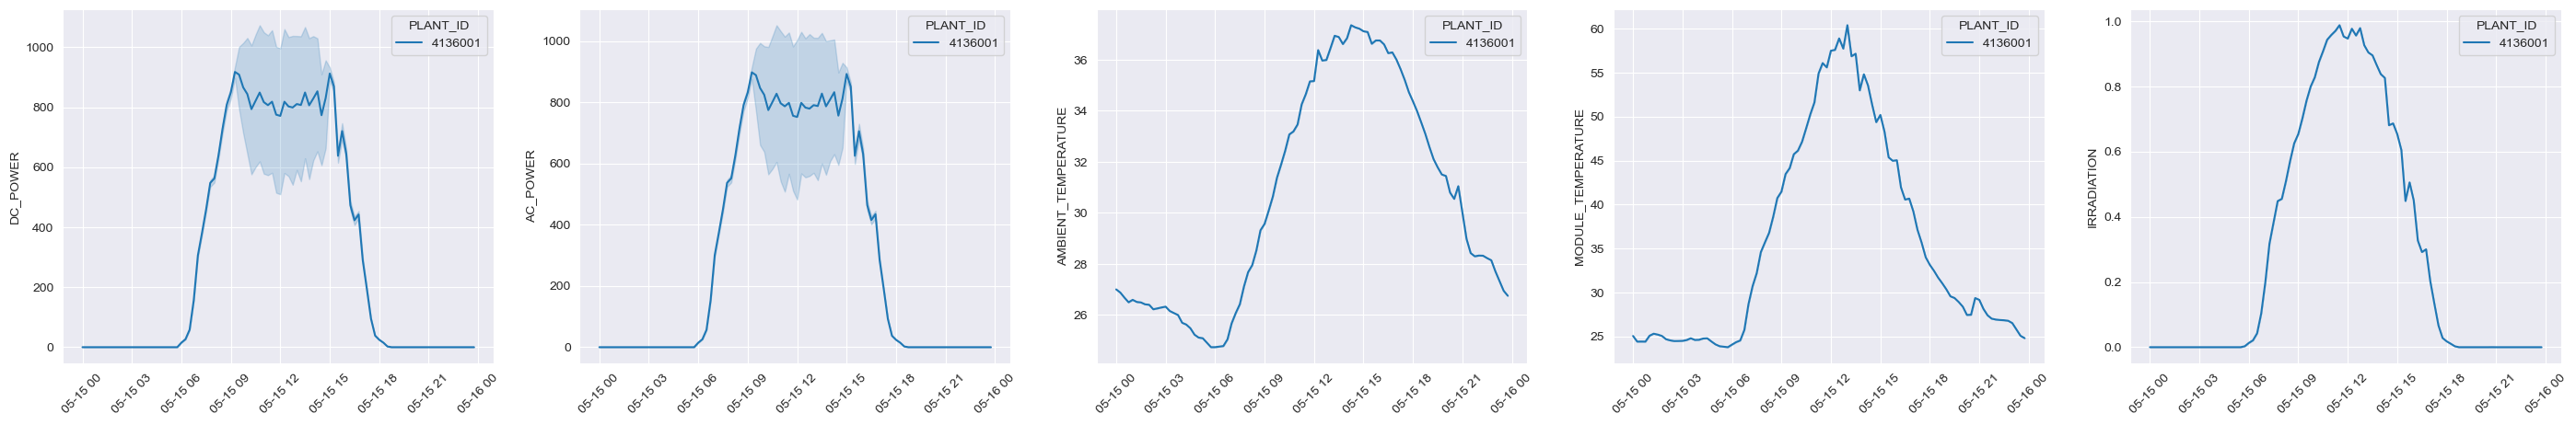

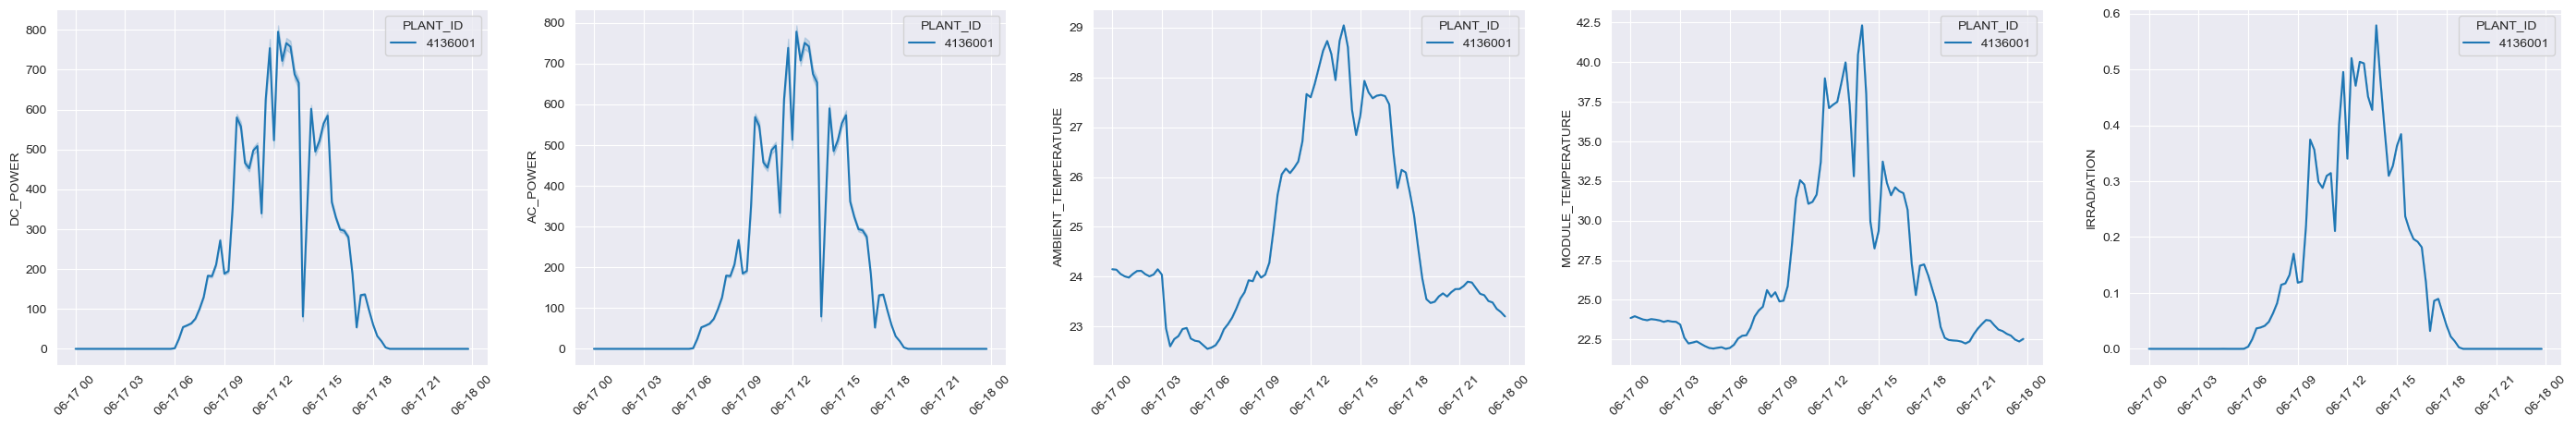

In [17]:
for date in ["2020-05-15", "2020-06-17"]:
    plot_date(df, date)

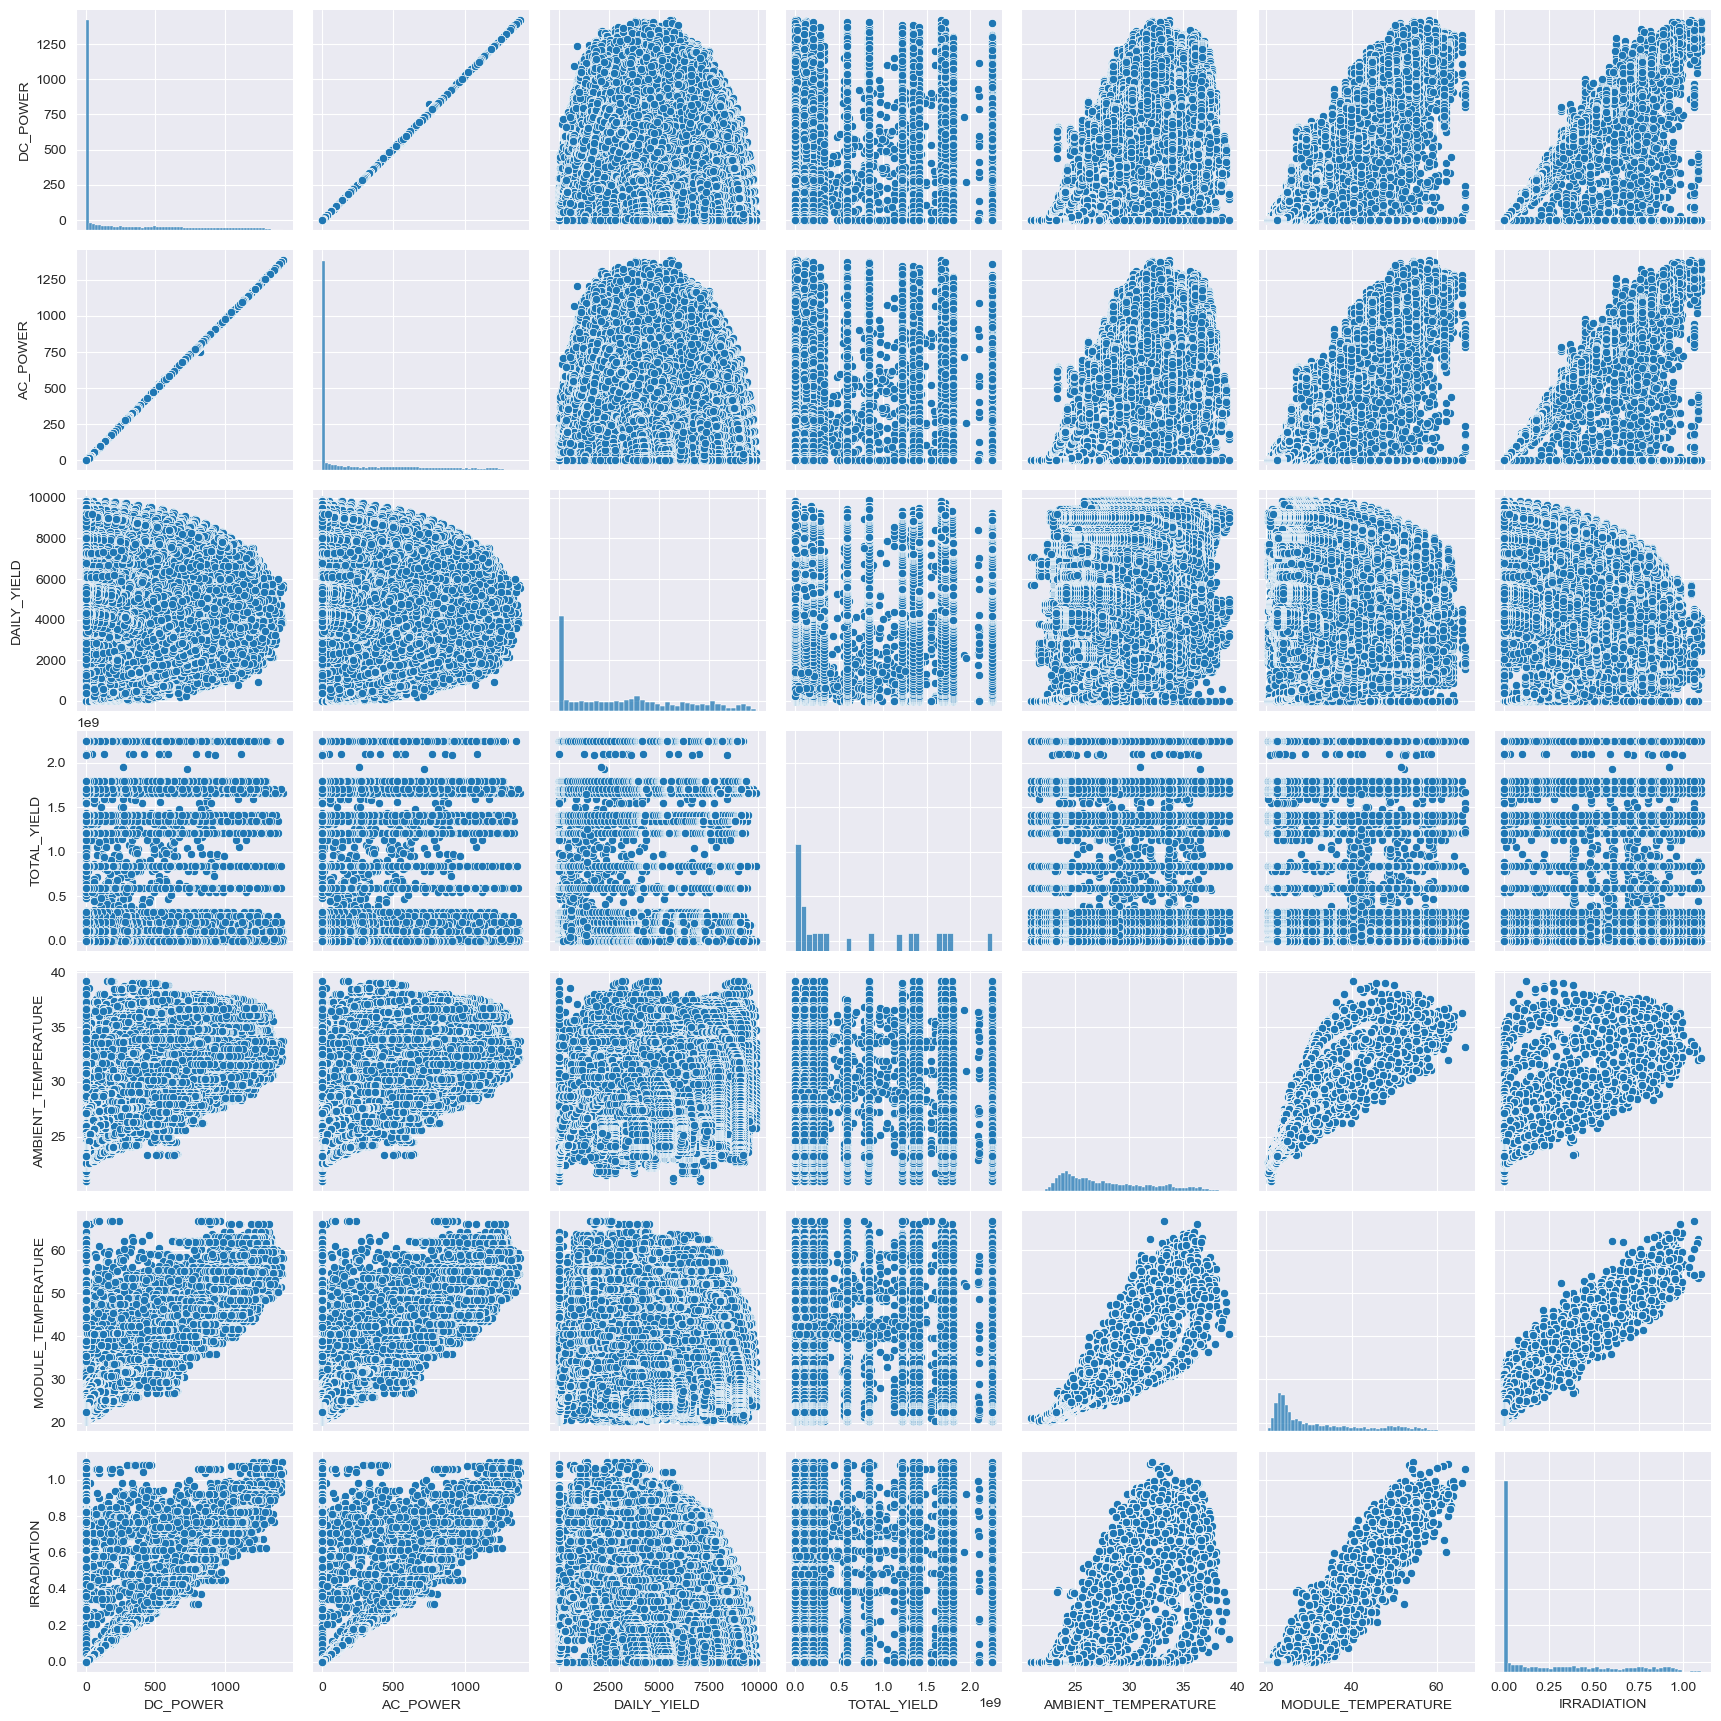

In [26]:
sns.pairplot(df.drop(['SOURCE_KEY_GENERATION', 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_WEATHER'], axis=1))
plt.show()

In [18]:
correlación= df.drop(['SOURCE_KEY_GENERATION', 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_WEATHER'], axis=1).corr(method='pearson')

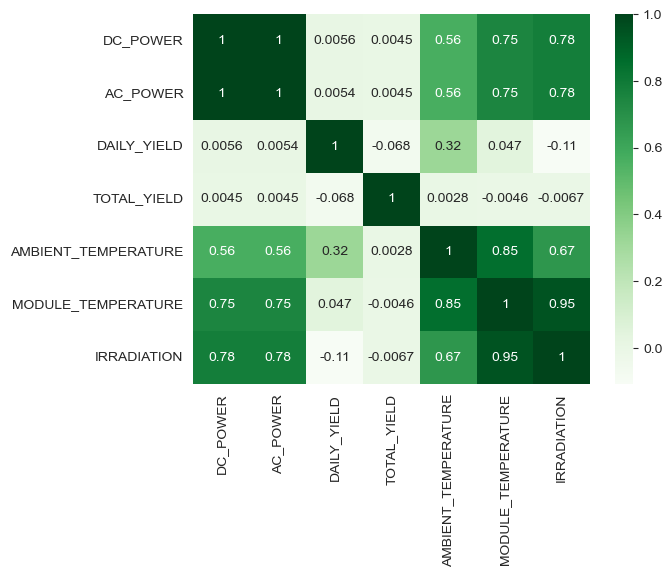

In [20]:
sns.heatmap(correlación, annot=True, cmap='Greens')
plt.show()

In [25]:
covarianza = df.drop(['SOURCE_KEY_GENERATION', 'PLANT_ID', 'SOURCE_KEY_WEATHER'], axis=1).cov(ddof=0)

In [26]:
covarianza

DATE_TIME   DC_POWER   AC_POWER  DAILY_YIELD   
DATE_TIME            7.315e+29 -2.221e+16 -2.163e+16   -2.457e+16  \
DC_POWER            -2.221e+16  1.373e+05  1.342e+05    6.051e+03   
AC_POWER            -2.163e+16  1.342e+05  1.311e+05    5.703e+03   
DAILY_YIELD         -2.457e+16  6.051e+03  5.703e+03    8.523e+06   
TOTAL_YIELD         -1.554e+22  1.224e+09  1.198e+09   -1.459e+11   
AMBIENT_TEMPERATURE -1.030e+15  8.393e+02  8.203e+02    3.778e+03   
MODULE_TEMPERATURE  -1.613e+15  3.119e+03  3.047e+03    1.533e+03   
IRRADIATION         -2.516e+13  8.953e+01  8.747e+01   -9.753e+01   

                     TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   
DATE_TIME             -1.554e+22           -1.030e+15          -1.613e+15  \
DC_POWER               1.224e+09            8.393e+02           3.119e+03   
AC_POWER               1.198e+09            8.203e+02           3.047e+03   
DAILY_YIELD           -1.459e+11            3.778e+03           1.533e+03   
TOTAL_YIELD            5.324e+17            8.140e+06          -3.806e+07   
AMBIENT_TEMPERATURE    8.140e+06            1.617e+01           3.833e+01   
MODULE_TEMPERATURE    -3.806e+07            3.833e+01           1.260e+02   
IRRADIATION           -1.517e+06            8.360e-01           3.289e+00   

                     IRRADIATION  
DATE_TIME             -2.516e+13  
DC_POWER               8.953e+01  
AC_POWER               8.747e+01  
DAILY_YIELD           -9.753e+01  
TOTAL_YIELD           -1.517e+06  
AMBIENT_TEMPERATURE    8.360e-01  
MODULE_TEMPERATURE     3.289e+00  
IRRADIATION            9.571e-02

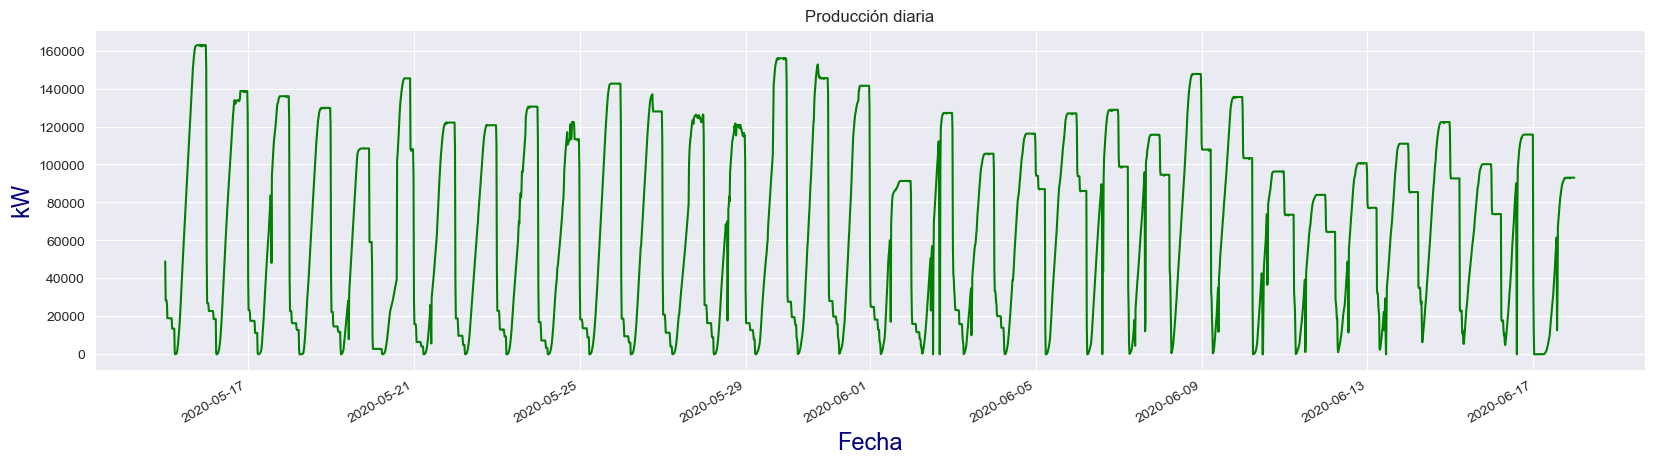

In [35]:
df_gen_group = df_plant2_gen.groupby('DATE_TIME').sum().reset_index()
df_gen_group['time']= df_plant2_gen['DATE_TIME'].dt.time

fig, ax = plt.subplots(dpi=100, figsize=(20,5))
# daily yield plot
df_gen_group.plot(x='DATE_TIME', y='DAILY_YIELD', color='green', ax=ax)
# AC & DC power plot
# df_plant1_gen_group.set_index('time').drop(['DATE_TIME'], axis=1)[['AC_POWER','DC_POWER']].plot(style='o', ax=ax[1])

ax.set_title('Producción diaria',)
# ax[1].set_title('AC power & DC power during day hours')
ax.set_ylabel('kW',color='navy',fontsize=17)
ax.set_xlabel('Fecha',color='navy',fontsize=17)
ax.get_legend().remove()
plt.show()


# Parte 2

In [27]:
# Agregamos de manera separada los campos de fecha y hora al dataframe
df["DATE"] = pd.to_datetime(df["DATE_TIME"]).dt.date
df["TIME"] = pd.to_datetime(df["DATE_TIME"]).dt.time
df['DAY'] = pd.to_datetime(df['DATE_TIME']).dt.day
df['MONTH'] = pd.to_datetime(df['DATE_TIME']).dt.month
df['WEEK'] = pd.to_datetime(df['DATE_TIME']).dt.isocalendar().week


# add hours and minutes for ml models
df['HOURS'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.hour
df['MINUTES'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.minute
df['TOTAL MINUTES PASS'] = df['MINUTES'] + df['HOURS']*60

# Agregamos la fecha como columnas de tipo string
df["DATE_STRING"] = df["DATE"].astype(str) # fecha como string
df["HOURS"] = df["HOURS"].astype(str)
df["TIME"] = df["TIME"].astype(str)

In [28]:
df.head(2)

DATE_TIME  PLANT_ID SOURCE_KEY_GENERATION  DC_POWER  AC_POWER  DAILY_YIELD   
0 2020-05-15   4136001       4UPUqMRk7TRMgml       0.0       0.0       9425.0  \
1 2020-05-15   4136001       81aHJ1q11NBPMrL       0.0       0.0          0.0   

   TOTAL_YIELD SOURCE_KEY_WEATHER  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   
0    2.429e+06    iq8k7ZNt4Mwm3w0               27.005              25.061  \
1    1.215e+09    iq8k7ZNt4Mwm3w0               27.005              25.061   

   IRRADIATION        DATE      TIME  DAY  MONTH  WEEK HOURS  MINUTES   
0          0.0  2020-05-15  00:00:00   15      5    20     0        0  \
1          0.0  2020-05-15  00:00:00   15      5    20     0        0   

   TOTAL MINUTES PASS DATE_STRING  
0                   0  2020-05-15  
1                   0  2020-05-15

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE_TIME              67698 non-null  datetime64[ns]
 1   PLANT_ID               67698 non-null  int64         
 2   SOURCE_KEY_GENERATION  67698 non-null  object        
 3   DC_POWER               67698 non-null  float64       
 4   AC_POWER               67698 non-null  float64       
 5   DAILY_YIELD            67698 non-null  float64       
 6   TOTAL_YIELD            67698 non-null  float64       
 7   SOURCE_KEY_WEATHER     67698 non-null  object        
 8   AMBIENT_TEMPERATURE    67698 non-null  float64       
 9   MODULE_TEMPERATURE     67698 non-null  float64       
 10  IRRADIATION            67698 non-null  float64       
 11  DATE                   67698 non-null  object        
 12  TIME                   67698 non-null  object        
 13  D

In [30]:
df.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
DATE                     0
TIME                     0
DAY                      0
MONTH                    0
WEEK                     0
HOURS                    0
MINUTES                  0
TOTAL MINUTES PASS       0
DATE_STRING              0
dtype: int64

In [31]:
def plot_date(df, date):
    
    ''' Plot data of the specified date'''
    
    plants = df.PLANT_ID.unique()
    df = df.loc[df.DATE_TIME.apply(lambda x: x.date()) == pd.Timestamp(date).date()]
    y_list = ["DC_POWER", "AC_POWER", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
    x = "DATE_TIME"
    colors = ["C{}".format(i) for i in range(len(y_list))]
    
    fig,ax = plt.subplots(1, len(y_list), figsize=(7*len(y_list),5))
    palette = sns.color_palette("colorblind")

    for i,y in enumerate(y_list):
        sns.lineplot(data=df, x=x, y=y, hue="PLANT_ID", palette=palette, ax=ax[i])
        ax[i].set_xlabel("")
        ax[i].tick_params(axis="x", rotation=45)

In [32]:
df = df.sort_values(["PLANT_ID", "DATE_TIME"]).reset_index(drop=True)

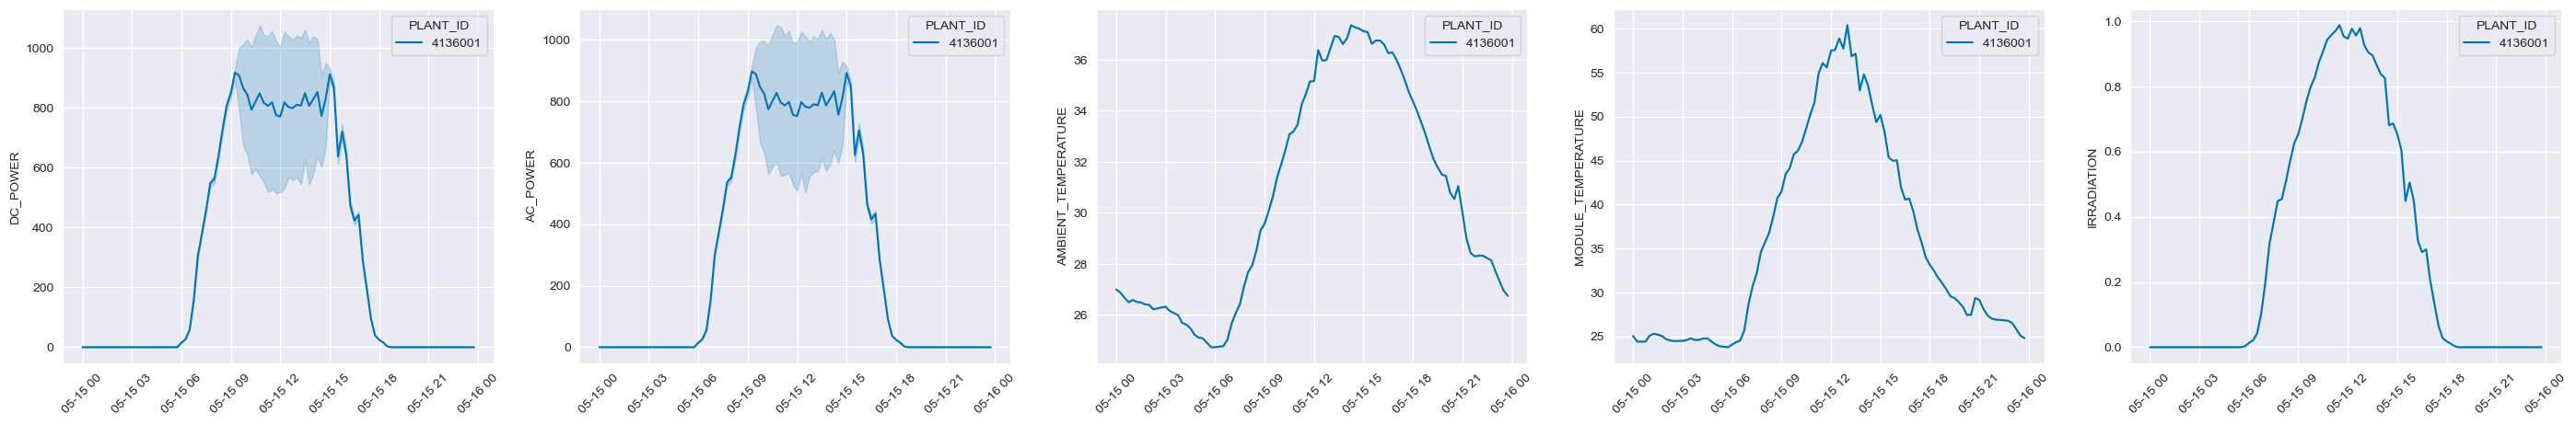

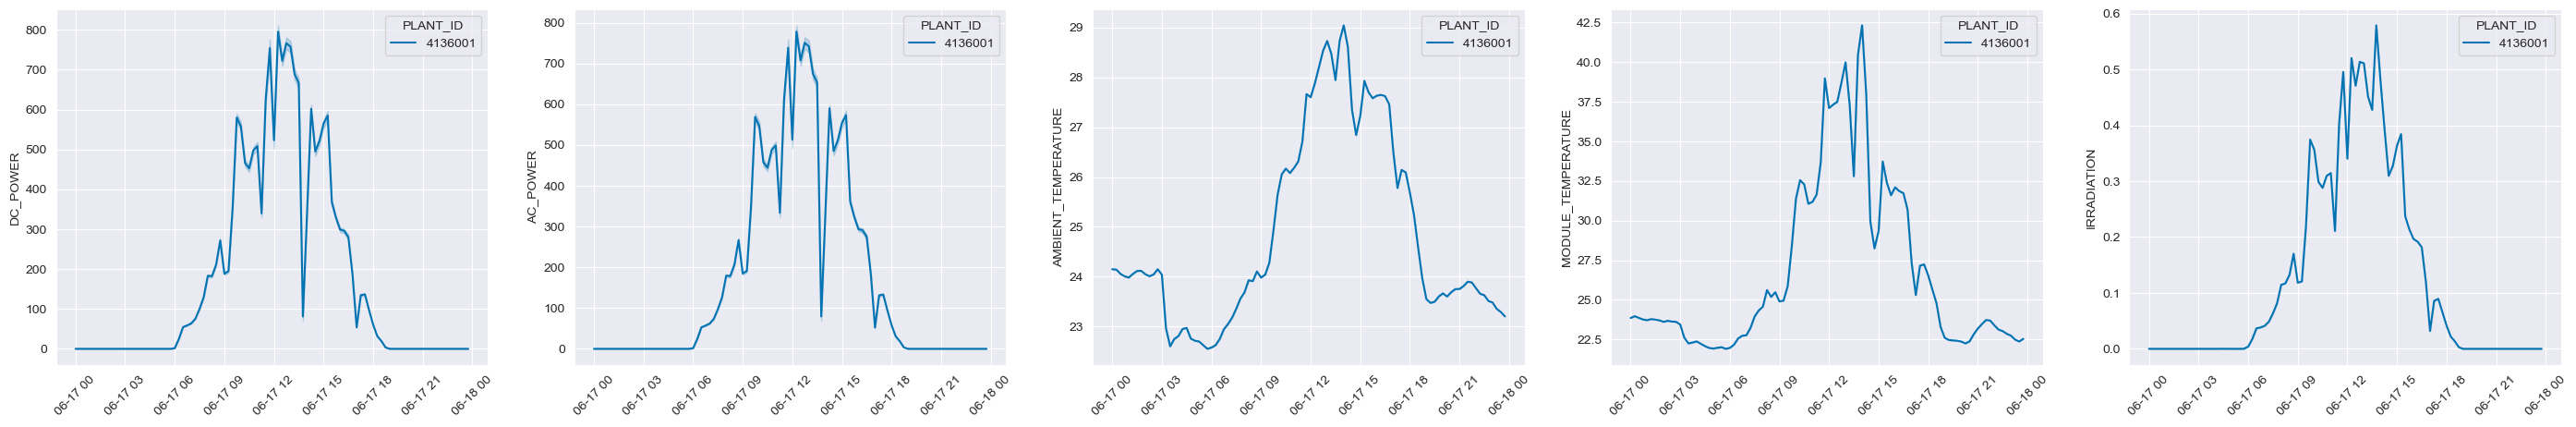

In [33]:
for date in ["2020-05-15", "2020-06-17"]:
    plot_date(df, date)

In [35]:
df.PLANT_ID.unique()

array([4135001], dtype=int64)

In [37]:
df.SOURCE_KEY_GENERATION.unique()

array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
       'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
       'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
       'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
       'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
       'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
       'xoJJ8DcxJEcupym'], dtype=object)

In [40]:
df.SOURCE_KEY_GENERATION.unique().size

22

In [48]:
range(1, 23)

range(1, 23)

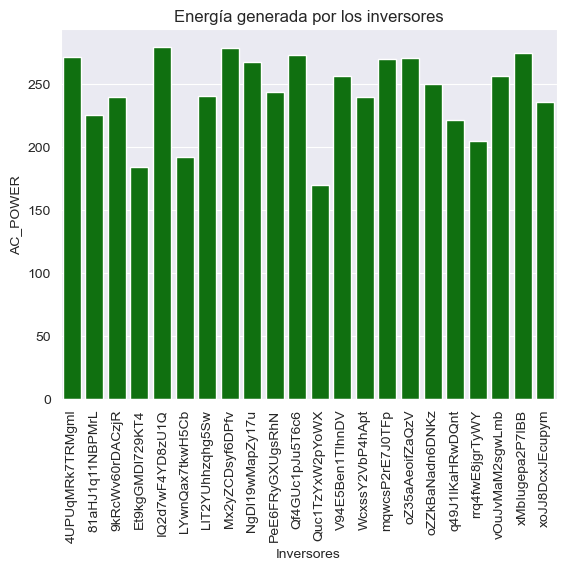

In [42]:
g = sns.barplot(data=df, x='SOURCE_KEY_GENERATION', y='AC_POWER', color='green', ci=None)
plt.xticks(rotation=90)
g.set_title("Energía generada por los inversores")
g.set(xlabel='Inversores')

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE_TIME              67698 non-null  datetime64[ns]
 1   PLANT_ID               67698 non-null  int64         
 2   SOURCE_KEY_GENERATION  67698 non-null  object        
 3   DC_POWER               67698 non-null  float64       
 4   AC_POWER               67698 non-null  float64       
 5   DAILY_YIELD            67698 non-null  float64       
 6   TOTAL_YIELD            67698 non-null  float64       
 7   SOURCE_KEY_WEATHER     67698 non-null  object        
 8   AMBIENT_TEMPERATURE    67698 non-null  float64       
 9   MODULE_TEMPERATURE     67698 non-null  float64       
 10  IRRADIATION            67698 non-null  float64       
 11  DATE                   67698 non-null  object        
 12  TIME                   67698 non-null  object        
 13  D

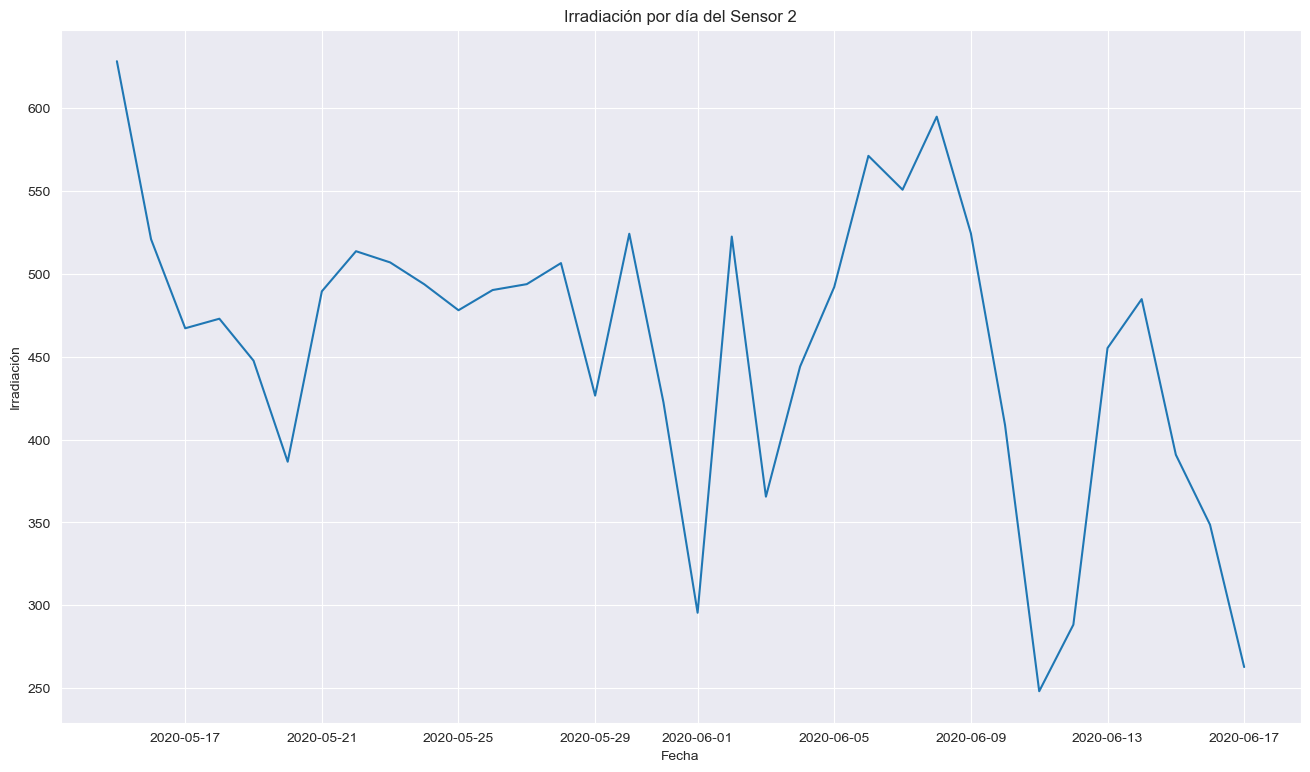

In [45]:
plt.figure(figsize=(16,9))
plt.plot(df.groupby(df['DATE'])['IRRADIATION'].sum())
plt.title('Irradiación por día del Sensor 2')
plt.xlabel('Fecha')
plt.ylabel('Irradiación')
plt.show()


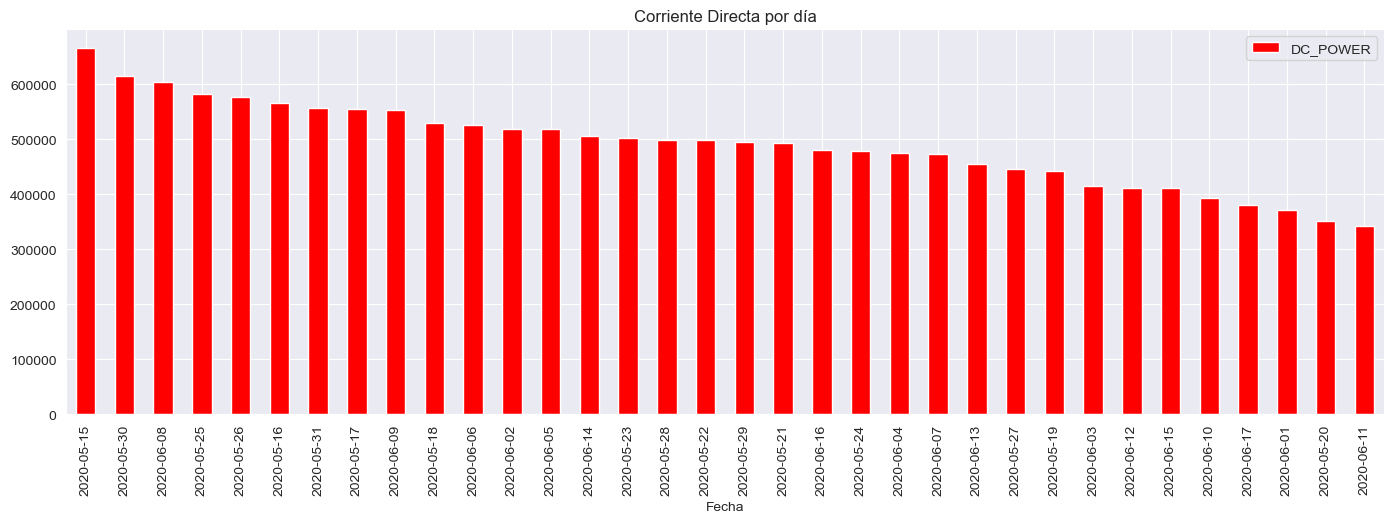

In [46]:
daily_dc = df.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True, color='red')
ax.set_title("Corriente Directa por día")
ax.set(xlabel="Fecha")
plt.show()

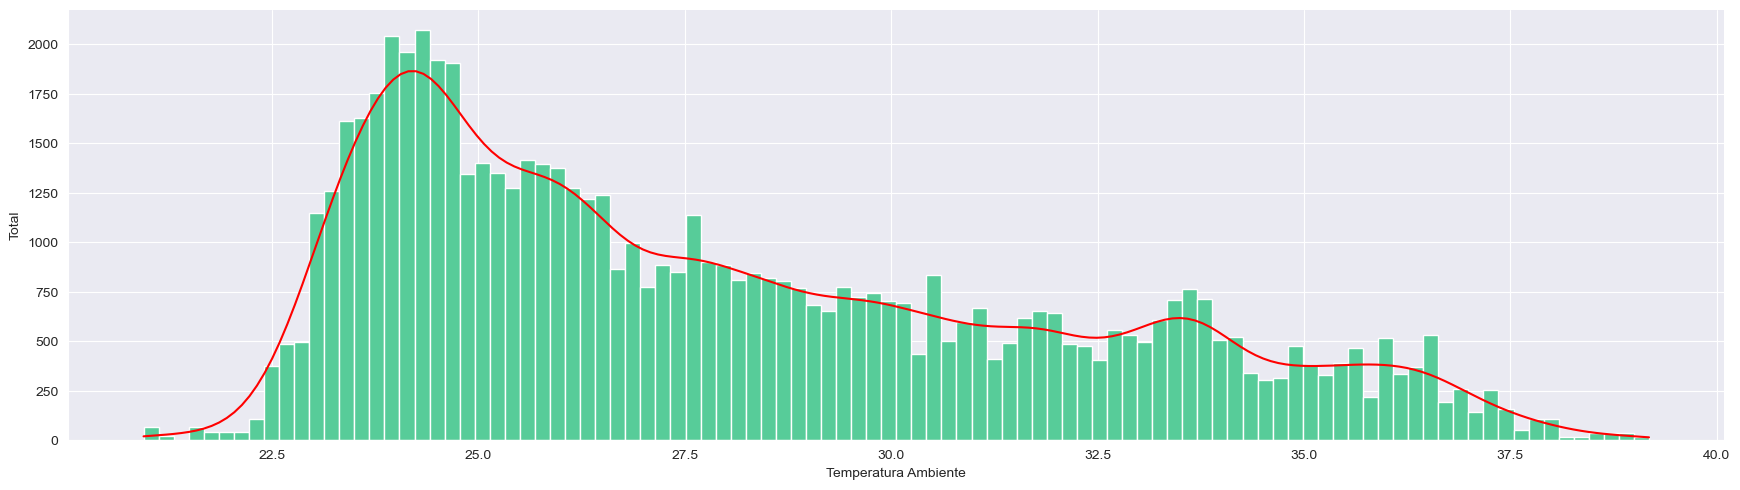

In [49]:
g = sns.displot(data=df, x="AMBIENT_TEMPERATURE", bins=100, kde=True, aspect=3.5, height=5, color='red', facecolor="#57cc99")
g.set(
    xlabel="Temperatura Ambiente",
    ylabel="Total"
)
plt.title = "Distribución de la temperatura ambiental"
plt.show()

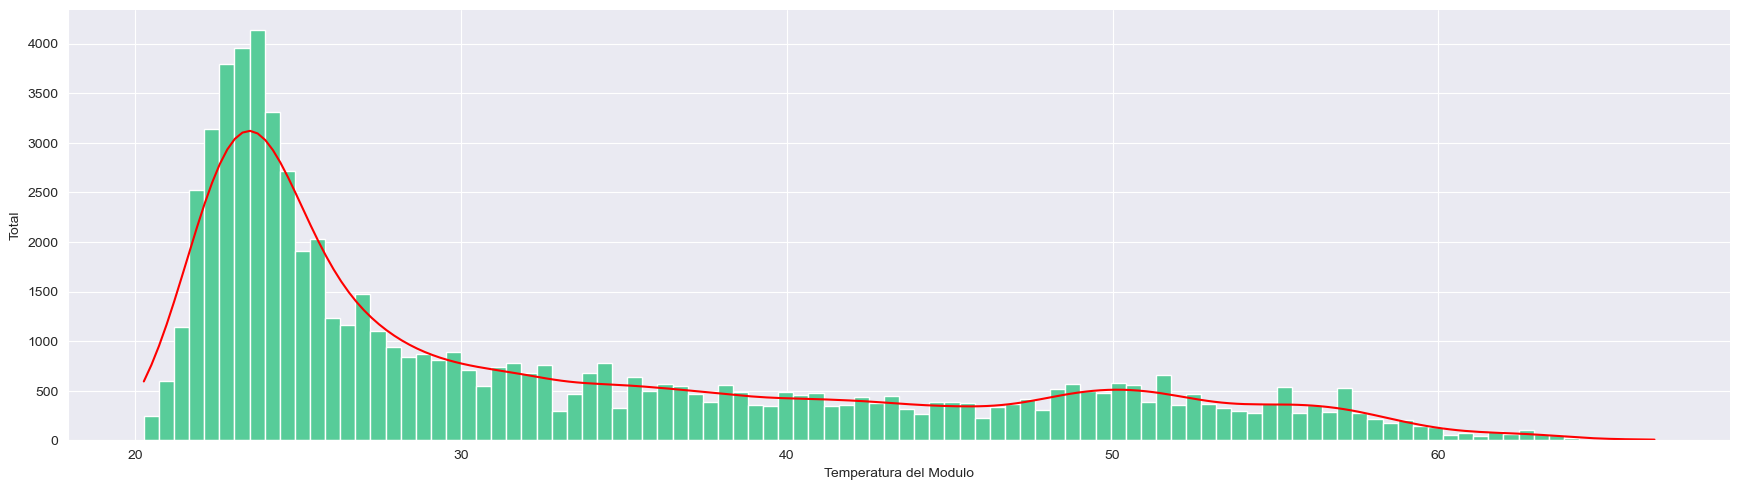

In [50]:
g = sns.displot(data=df, x="MODULE_TEMPERATURE", bins=100, kde=True, aspect=3.5, height=5, color='red', facecolor="#57cc99")
g.set(
    xlabel="Temperatura del Modulo",
    ylabel="Total"
)
g.set_titles("Distribución de la temperatura del modulo")
plt.title = "Distribución de la temperatura del modulo"
plt.show()

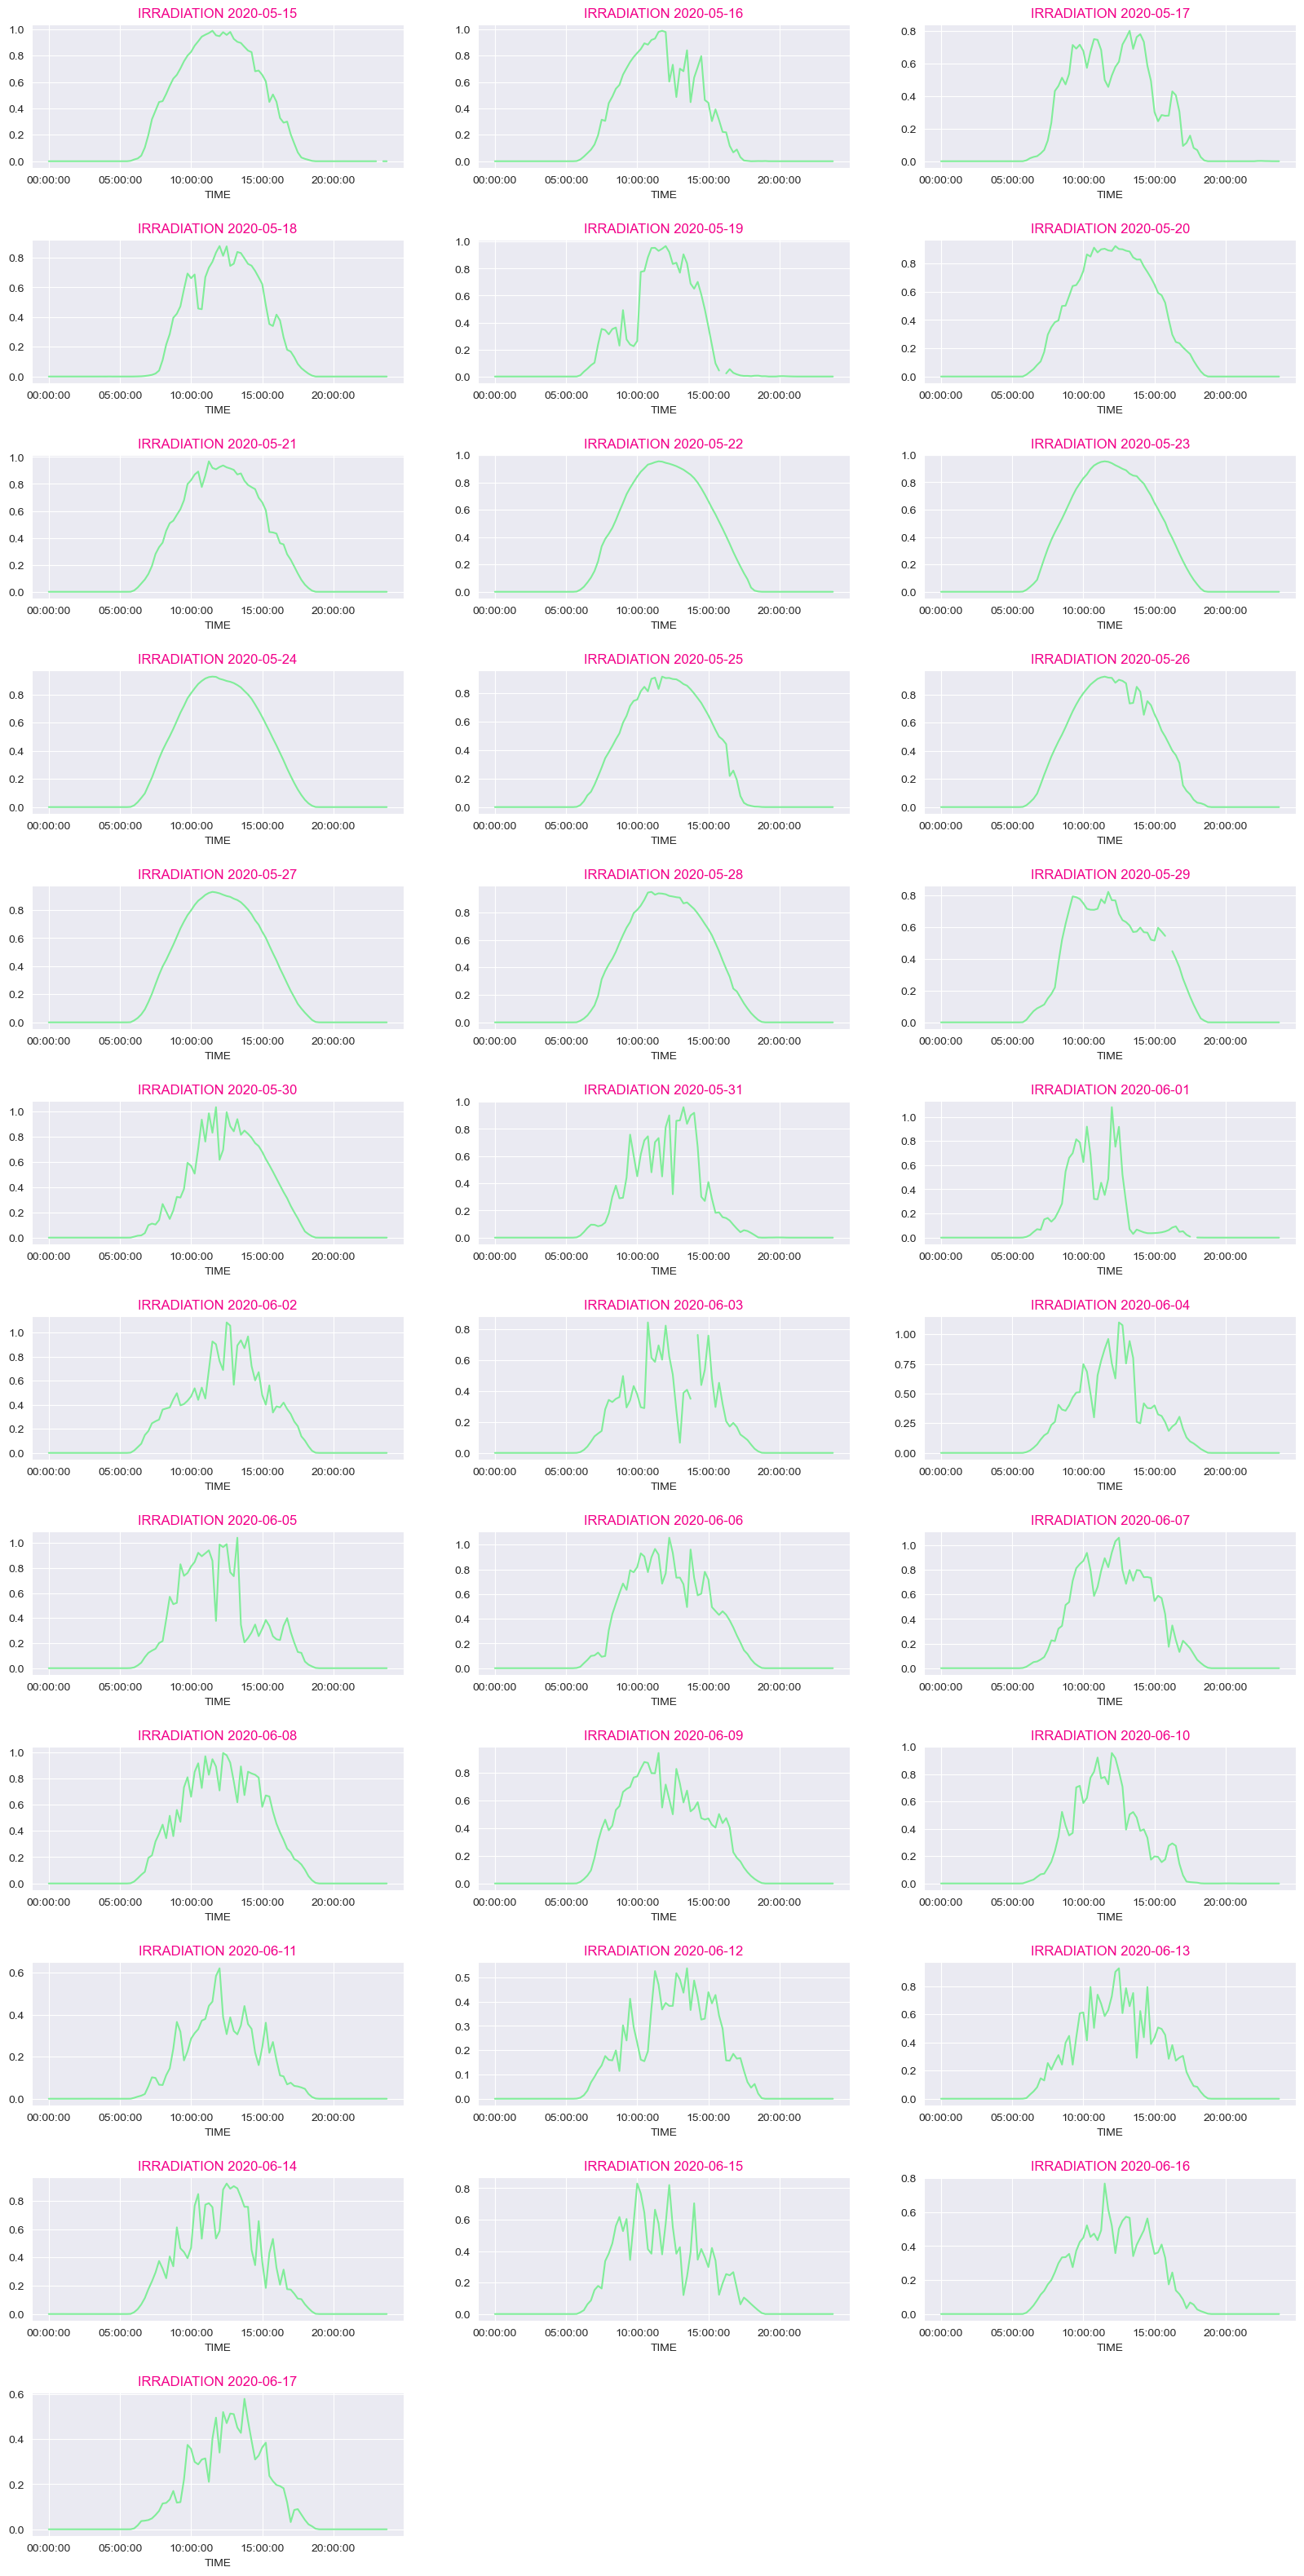

In [52]:
solar_irradiation = df.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#80ed99')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#f20089')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)